In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pygal




In [2]:
netflix=pd.read_csv("netflix.csv")


In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8790 non-null   object 
 1   type          8790 non-null   object 
 2   title         8790 non-null   object 
 3   director      8790 non-null   object 
 4   country       8790 non-null   object 
 5   date_added    8790 non-null   object 
 6   release_year  8790 non-null   int64  
 7   score         8405 non-null   float64
 8   rating        8790 non-null   object 
 9   duration      8790 non-null   object 
 10  listed_in     8790 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 755.5+ KB


In [4]:
netflix.head()

,show_id,type,title,director,country,date_added,release_year,score,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,7.4,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,7.3,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,7.6,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,6.9,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,6.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'score', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [6]:
netflix.describe()

,release_year,score
count,8790.000000,8405.000000
mean,2014.183163,6.184533
std,8.825466,2.030113
min,1925.000000,0.000000
25%,2013.000000,5.800000
50%,2017.000000,6.600000
75%,2019.000000,7.400000
max,2021.000000,10.000000


In [7]:
# Checking if there are any duplicates
netflix.duplicated().value_counts()

False    8790
dtype: int64

In [8]:
def mostCommuneDuration(data=netflix,nbr=10):
    
    data=netflix.groupby('duration').count().sort_values(by='show_id',ascending=False)
    data=data["show_id"]
    list(data[:10])
    labels=data.index[:nbr]
    values=list(data[:nbr])
    plt.pie(values,labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title("Most Commune Duration")
    plt.show
    

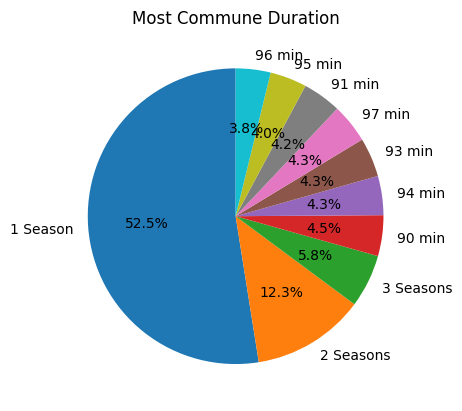

In [9]:
mostCommuneDuration(data=netflix,nbr=10)

In [10]:
def mostTypeOfSohw(data=netflix):
    data=netflix.groupby(by="type").count()
    data=data["show_id"]
    labels=data.index
    values=list(data)
    plt.pie(values,labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title("Most comunne type of show")
    plt.show

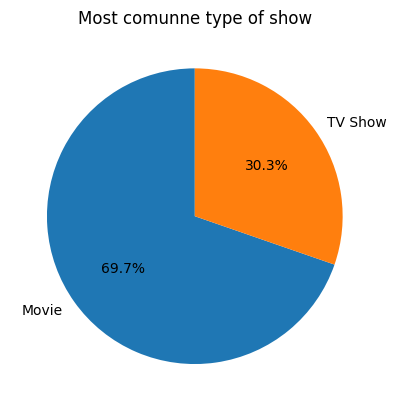

In [11]:
mostTypeOfSohw()

In [12]:
#cleanning of themes
df_clean=netflix

In [13]:
df_clean['Genre1'] = 0
df_clean['Genre2'] = 0
df_clean['Genre3'] = 0
temp_cat = df_clean.listed_in.str.split(',')
i=0
for i in range (8790):
    t_cat = temp_cat[i]
    if len(t_cat) == 1:
        df_clean['Genre1'][i] = temp_cat[i][0]
        df_clean['Genre2'][i] = 0
        df_clean['Genre3'][i] = 0
    if len(t_cat) == 2:
        df_clean['Genre1'][i] = temp_cat[i][0]
        df_clean['Genre2'][i] = temp_cat[i][1]
        df_clean['Genre3'][i] = 0
    if len(t_cat) == 3:
        df_clean['Genre1'][i] = temp_cat[i][0]
        df_clean['Genre2'][i] = temp_cat[i][1]
        df_clean['Genre3'][i] = temp_cat[i][2]

C:\Users\zacha\AppData\Local\Temp\ipykernel_23456\1274348222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Genre1'][i] = temp_cat[i][0]
C:\Users\zacha\AppData\Local\Temp\ipykernel_23456\1274348222.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Genre2'][i] = 0
C:\Users\zacha\AppData\Local\Temp\ipykernel_23456\1274348222.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Genre3'][i] = 0
C:\User

In [83]:
def mostCommuneGenre1(data=netflix,nbr=5):
    data=df_clean.groupby(by="Genre1").count().sort_values(by='show_id',ascending=False)
    data=data["show_id"]
    labels=data.index[:nbr]
    values=list(data[:nbr])
    plt.pie(values,labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title("Most comunne Genre 1")
    plt.show



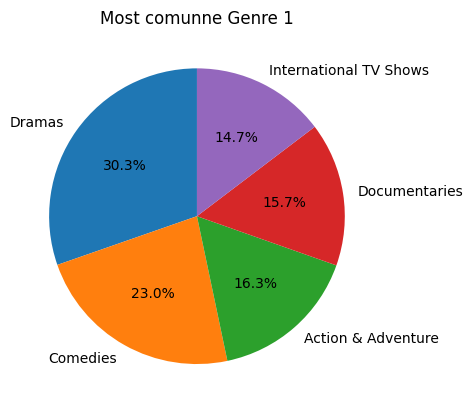

In [84]:
mostCommuneGenre1()

C:\Users\zacha\AppData\Local\Temp\ipykernel_23456\351291047.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=df.groupby(by="Genre1").mean().sort_values(by='score',ascending=False)


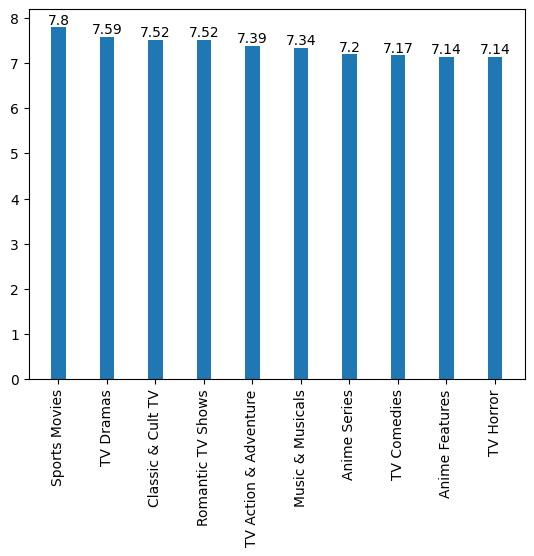

In [16]:
def meanScoreOfmostPopulareGenre(df=netflix,nbr=10):
    data=df.groupby(by="Genre1").mean().sort_values(by='score',ascending=False)
    data=data["score"]
    data=data.map(lambda x:str(x)[:4])
    data=data.map(lambda x: float(x))
    labels=data.index[:nbr]
    sizes=data[:nbr]
    plt.bar(labels,sizes,width=0.3)
    plt.xticks(rotation=90)
    for i in range(len(sizes)):
        plt.annotate(str(sizes[i]), xy=(labels[i],sizes[i]), ha='center', va='bottom')
    plt.show()
    
meanScoreOfmostPopulareGenre()


In [17]:
score_by_country=netflix.groupby(by="country").mean().sort_values(by='score',ascending=False)
score_by_country=score_by_country["score"]
nbr_movie_by_country=netflix.groupby(by="country").count().sort_values(by='score',ascending=False)
nbr_movie_by_country=nbr_movie_by_country["show_id"]
nbr_movie_by_country=pd.DataFrame(nbr_movie_by_country)
nbr_movie_by_country["score"]=list(score_by_country)
data=nbr_movie_by_country
data.columns=["nbr_show","score"]



C:\Users\zacha\AppData\Local\Temp\ipykernel_23456\2476004678.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_by_country=netflix.groupby(by="country").mean().sort_values(by='score',ascending=False)


In [18]:
data["CountryName"]=data.index
data.index=[i for i in range(len(data))]
df=data
test=pd.DataFrame(df["CountryName"])
test

,CountryName
0,United States
1,India
2,United Kingdom
3,Pakistan
4,Canada
...,...
81,Soviet Union
82,Paraguay
83,Puerto Rico
84,Somalia


In [19]:
test["nbr_show"]=data["nbr_show"]
test

,CountryName,nbr_show
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Canada,271
...,...,...
81,Soviet Union,1
82,Paraguay,1
83,Puerto Rico,1
84,Somalia,1


In [20]:
#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [21]:
Country=[]
Continent=[]
codes=[]
for i in range(len(test)):
    country_name,country_continent=get_continent(test["CountryName"][i])
    codes.append((country_name,country_continent))
    Country.append(country_name)
    Continent.append(country_continent)
test["Country"]=Country
test["Continent"]=Continent
test["codes"]=codes
test

,CountryName,nbr_show,Country,Continent,codes
0,United States,3240,US,NA,"(US, NA)"
1,India,1057,IN,AS,"(IN, AS)"
2,United Kingdom,638,GB,EU,"(GB, EU)"
3,Pakistan,421,PK,AS,"(PK, AS)"
4,Canada,271,CA,NA,"(CA, NA)"
...,...,...,...,...,...
81,Soviet Union,1,Unknown,Unknown,"(Unknown, Unknown)"
82,Paraguay,1,PY,SA,"(PY, SA)"
83,Puerto Rico,1,PR,NA,"(PR, NA)"
84,Somalia,1,SO,AF,"(SO, AF)"


In [22]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='your unique UA')
def geolocate(country):
    try:
        # Geolocate the center of the country
        
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [23]:

Geolocate=[]
Latitude=[]
Longitude=[]
for i in range(len(test)):
    cn_latitude,cn_longitude=geolocate(test["CountryName"][i])
    Geolocate.append((cn_latitude,cn_longitude))
    Latitude.append(cn_latitude)
    Longitude.append(cn_longitude)
test["Geolocate"]=Geolocate
test["Latitude"]=Latitude
test["Longitude"]=Longitude
country_info=test

In [24]:
movie=netflix[netflix["type"]=="Movie"]
tvShow=netflix[netflix["type"]!="Movie"]

In [25]:
netflix["date_added"]=pd.to_datetime(netflix["date_added"])
netflix["release_year"]=pd.to_datetime(netflix["release_year"],format='%Y')
netflix["TimeForAdd"]=netflix["date_added"]-netflix["release_year"]
netflix["TimeForAdd"]=netflix["TimeForAdd"].map(lambda x : x.days)
netflix["TimeForAdd"]=netflix["TimeForAdd"].map(lambda x : int(x))
netflix.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   datetime64[ns]
 7   score         8405 non-null   float64       
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  Genre1        8790 non-null   object        
 12  Genre2        8790 non-null   object        
 13  Genre3        8790 non-null   object        
 14  TimeForAdd    8790 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int6

C:\Users\zacha\AppData\Local\Temp\ipykernel_23456\3681094933.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=netflix.groupby(by="date_added").mean()
C:\Users\zacha\AppData\Local\Temp\ipykernel_23456\3681094933.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test=pd.DataFrame(test.groupby(by="year_added").mean())


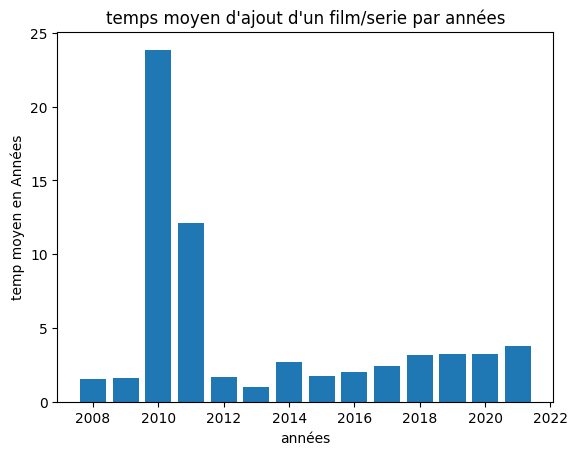

In [26]:
data=netflix.groupby(by="date_added").mean()
day=list(data["TimeForAdd"])
date=data.index
test=pd.DataFrame(date)
test["day"]=day
test["year"]=test["day"].map(lambda x:x/365)
test["year_added"]=test["date_added"].map(lambda x:x.year)
test=pd.DataFrame(test.groupby(by="year_added").mean())
plt.bar(test.index,test["year"])
plt.title("temps moyen d'ajout d'un film/serie par années")
plt.xlabel("années")
plt.ylabel("temp moyen en Années")
plt.show()

In [63]:

df = px.data.gapminder().query("year==2007")
country=list(df["country"].unique())
list_country=list(country_info["CountryName"])
list_country[0]





'United States'

In [47]:
import jaro
def get_Ressemblance_Unité(ingredient,Aliment):
    ind_max=0
    ingredient1=str(ingredient)
    score_max=0
    for i in range(len(Aliment)):
        ingredient2=str(Aliment[i])
        score=jaro.jaro_metric(ingredient1,ingredient2)
        if score >=score_max :
            ind_max=i
            score_max=score
    return Aliment[ind_max]


In [49]:
country_info["match_country"]=country_info["CountryName"].map(lambda x:get_Ressemblance_Unité(x,country))
country_info

,CountryName,nbr_show,Country,Continent,codes,Geolocate,Latitude,Longitude,match_country
0,United States,3240,US,NA,"(US, NA)","(39.7837304, -100.445882)",39.783730,-100.445882,United States
1,India,1057,IN,AS,"(IN, AS)","(22.3511148, 78.6677428)",22.351115,78.667743,India
2,United Kingdom,638,GB,EU,"(GB, EU)","(54.7023545, -3.2765753)",54.702354,-3.276575,United Kingdom
3,Pakistan,421,PK,AS,"(PK, AS)","(30.3308401, 71.247499)",30.330840,71.247499,Pakistan
4,Canada,271,CA,NA,"(CA, NA)","(61.0666922, -107.991707)",61.066692,-107.991707,Canada
...,...,...,...,...,...,...,...,...,...
81,Soviet Union,1,Unknown,Unknown,"(Unknown, Unknown)","(44.566633350000004, 27.359792969682104)",44.566633,27.359793,Slovenia
82,Paraguay,1,PY,SA,"(PY, SA)","(-23.3165935, -58.1693445)",-23.316593,-58.169345,Paraguay
83,Puerto Rico,1,PR,NA,"(PR, NA)","(18.2247706, -66.4858295)",18.224771,-66.485829,Puerto Rico
84,Somalia,1,SO,AF,"(SO, AF)","(8.3676771, 49.083416)",8.367677,49.083416,Somalia


In [67]:
df.columns=["match_country", 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num']
df

,match_country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [69]:
finalmap=df.merge(country_info , on="match_country")
finalmap

,match_country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,CountryName,nbr_show,Country,Continent,codes,Geolocate,Latitude,Longitude
0,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32,Argentina,76,AR,SA,"(AR, SA)","(-34.9964963, -64.9672817)",-34.996496,-64.967282
1,Australia,Oceania,2007,81.235,20434176,34435.367440,AUS,36,Australia,114,AU,OC,"(AU, OC)","(-24.7761086, 134.755)",-24.776109,134.755000
2,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40,Russia,19,RU,EU,"(RU, EU)","(64.6863136, 97.7453061)",64.686314,97.745306
3,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40,Austria,9,AT,EU,"(AT, EU)","(47.59397, 14.12456)",47.593970,14.124560
4,Bangladesh,Asia,2007,64.062,150448339,1391.253792,BGD,50,Bangladesh,3,BD,AS,"(BD, AS)","(24.4769288, 90.2934413)",24.476929,90.293441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,United States,Americas,2007,78.242,301139947,42951.653090,USA,840,United Arab Emirates,21,AE,AS,"(AE, AS)","(24.0002488, 53.9994829)",24.000249,53.999483
82,Uruguay,Americas,2007,76.384,3447496,10611.462990,URY,858,Uruguay,9,UY,SA,"(UY, SA)","(-32.8755548, -56.0201525)",-32.875555,-56.020153
83,Venezuela,Americas,2007,73.747,26084662,11415.805690,VEN,862,Venezuela,2,VE,SA,"(VE, SA)","(8.0018709, -66.1109318)",8.001871,-66.110932
84,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704,Vietnam,7,VN,AS,"(VN, AS)","(15.9266657, 107.9650855)",15.926666,107.965086


In [78]:
fig = px.choropleth(finalmap, locations="iso_alpha",
                    color="nbr_show",
                    hover_name="CountryName",
                    range_color=[0,3240],
                    center = {"lat":0,"lon":0}
                    )

fig.show()